# <center>Image Classification based on the Fashion M-Nist Dataset </center>

## <center>Summary </center>

This notebook contains a simple image classification model that is trained on the Fashion M-NIST data set. It is built using Keras to train a sequential convolutional neural network to classify images into one of 10 classes. Convolutional Neural Networks have been shown to provide good performance in the sphere of image classification, which is why one was chosen for this task.Pooling and dropout layers have been used to improve the performance of the model.

The model trained has a test accuracy of 99%, which improves on most [benchmarks](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/#)

### Import Libraries

In [225]:
#utilities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Model
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical

#Metrics
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

### Import Data and Explore It

In [227]:
# Import Fashion M-Nist as per keras documentation
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [228]:
# check the shape of the imports
print("X Train Shape: {}".format(x_train.shape))
print("Y Train Shape: {}".format(y_train.shape))
print("X Test Shape: {}".format(x_test.shape))
print("Y Test Shape: {}".format(y_test.shape))

X Train Shape: (60000, 28, 28)
Y Train Shape: (60000,)
X Test Shape: (10000, 28, 28)
Y Test Shape: (10000,)


Label	Description as per fashion m-nist:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot
  
  
Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images

In [229]:
# Make a list of the text labels
fashion_mnist_labels = ["T-shirt/top",
                        "Trouser",      
                        "Pullover",    
                        "Dress",        
                        "Coat",       
                        "Sandal",       
                        "Shirt",       
                        "Sneaker",      
                        "Bag",         
                        "Ankle boot"]  

In [230]:
def show_images(x,y,size):
    """Select 4 random images and display them along with their class
    -better way would be to have a parameter to select sample size and use a loop."""
    fig,ax=plt.subplots(2,2,figsize=(10,10))
    ind1=np.random.randint(0,size)
    ind2=np.random.randint(0,size)
    ind3=np.random.randint(0,size)
    ind4=np.random.randint(0,size)
    ax[0,0].imshow(x[ind1])
    ax[0,0].set_title(fashion_mnist_labels[y[ind1]])
    ax[0,1].imshow(x[ind2])
    ax[0,1].set_title(fashion_mnist_labels[y[ind2]])
    ax[1,0].imshow(x[ind3])
    ax[1,0].set_title(fashion_mnist_labels[y[ind3]])
    ax[1,1].imshow(x[ind4])
    ax[1,1].set_title(fashion_mnist_labels[y[ind4]])    

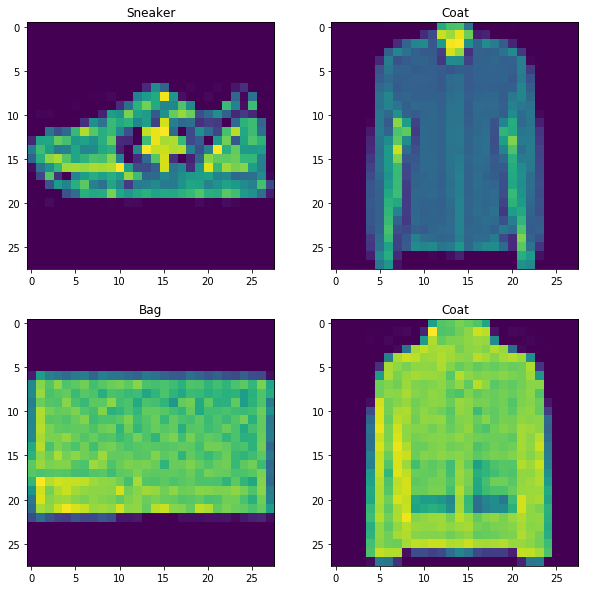

In [231]:
# Random sample of images
show_images(x_train,y_train,50000)

* Check balance on classes!

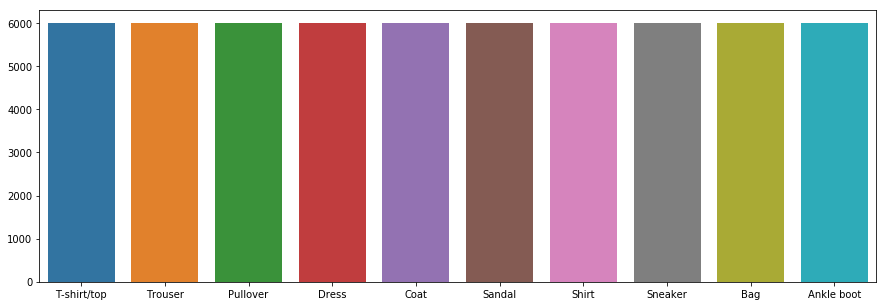

In [232]:
fig,ax = plt.subplots(figsize=(15,5))
sns.barplot(fashion_mnist_labels,np.unique(y_train, return_counts=True)[1],ax=ax)

In [233]:
np.unique(y_train, return_counts=True)
# Order is the same as the list I made so I can use it as a label

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

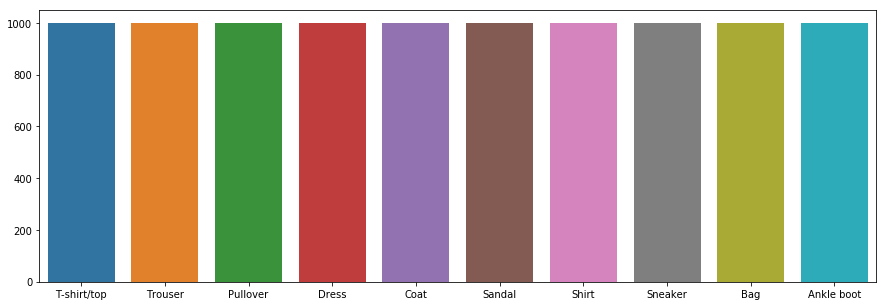

In [234]:
fig,ax = plt.subplots(figsize=(15,5))
sns.barplot(fashion_mnist_labels,np.unique(y_test, return_counts=True)[1],ax=ax)

The classes look balanced for each one. That means that to improve on a random guess accuracy would need to be better that 10%.

### Pre Processing

In [235]:
# Reshape the input data to one usable by the model
img_row = 28
img_col = 28
channel = 1
nclasses = 10

# Images
x_train = x_train.reshape(x_train.shape[0],img_row,img_col,channel)
x_test  = x_test.reshape(x_test.shape[0],img_row,img_col,channel)

# One hot encoding of the the target classes
y_train = to_categorical(y_train,num_classes=nclasses)
y_test = to_categorical(y_test,num_classes=nclasses)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
# Print test set shape
print("x_test shape:", x_train.shape, "y_test shape:", y_train.shape)

x_train shape: (60000, 28, 28, 1) y_train shape: (60000, 10)
x_test shape: (60000, 28, 28, 1) y_test shape: (60000, 10)


### Model

Set up model architecture

In [247]:
# * tweak model layers (pooling, padding, batch norm, dilation, size) - do in colab 
model = Sequential()

# Must define the input shape in the first layer of the neural network
#Input Layer, First Convolutional layer
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1))) 

# First Max Pooling Layer
model.add(MaxPooling2D(pool_size=2))
# First Dropout Layer
model.add(Dropout(0.3))

# Second convolutional layer
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))

# Second Max Pooling Layer
model.add(MaxPooling2D(pool_size=2))
# Second Dropout Layer
model.add(Dropout(0.3))

# Flattening Layer
model.add(Flatten())

# First Dense layer
model.add(Dense(256, activation='relu'))

# Third dropout layer
model.add(Dropout(0.5))

# Output Layer. 10 units since there are 10 classes. Softmax activation for probalilities
model.add(Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3136)              0         
__________

Compile Model

In [248]:
# Specificy loss function, optimizer and metrics to tune model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Train the model

In [249]:
checkpointer = ModelCheckpoint(filepath='model_best.hdf5', verbose = 1, save_best_only=True)
#This saves the best model with so it can be used later without retraining

training = model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_split = 0.2,
         callbacks=[checkpointer])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 114s 2ms/step - loss: 7.3964 - acc: 0.4457 - val_loss: 0.6328 - val_acc: 0.7995

Epoch 00001: val_loss improved from inf to 0.63280, saving model to model_best.hdf5
Epoch 2/10
48000/48000 [==============================] - 112s 2ms/step - loss: 0.5837 - acc: 0.7832 - val_loss: 0.4153 - val_acc: 0.8532

Epoch 00002: val_loss improved from 0.63280 to 0.41529, saving model to model_best.hdf5
Epoch 3/10
48000/48000 [==============================] - 112s 2ms/step - loss: 0.4775 - acc: 0.8244 - val_loss: 0.3846 - val_acc: 0.8658

Epoch 00003: val_loss improved from 0.41529 to 0.38459, saving model to model_best.hdf5
Epoch 4/10
48000/48000 [==============================] - 112s 2ms/step - loss: 0.4270 - acc: 0.8411 - val_loss: 0.3346 - val_acc: 0.8782

Epoch 00004: val_loss improved from 0.38459 to 0.33460, saving model to model_best.hdf5
Epoch 5/10
48000/48000 [======================

Load weights with best accuracy

In [239]:
# Load the weights with the best validation accuracy
model.load_weights('model_best.hdf5')

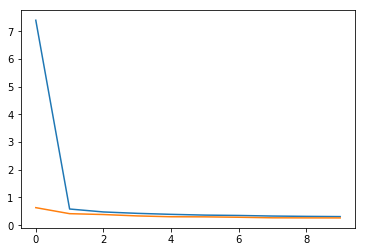

In [250]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])

### Evaluate Model Perfomance

Test Accuracy

In [242]:
# Make Predictions on the test set
y_pred = model.predict(x_test)
# Predicted Classes
y_pred_classes = model.predict_classes(x_test)

In [243]:
# Evaluate the model accuracy on test set
score = model.evaluate(x_test, y_test)
# Print test accuracy
print('Test accuracy:{}%'.format(round(score[1]*100,2)))

10000/10000 [==============================] - 6s 588us/step
Test accuracy:88.62%


In [244]:
# Need to use argmax because of the one hot encoding
print(confusion_matrix(y_test.argmax(axis=1), y_pred_classes))

# couldn't find how to get the labels displayed. Should ask about this.

[[856   0  11  26   5   1  92   0   9   0]
 [  1 971   0  20   4   0   2   0   2   0]
 [ 15   0 777   9 139   0  60   0   0   0]
 [ 14   3   6 912  30   0  33   0   2   0]
 [  0   3  53  33 857   0  51   0   3   0]
 [  0   0   0   0   0 949   0  34   0  17]
 [138   2  62  37 104   0 644   0  13   0]
 [  0   0   0   0   0   3   0 985   0  12]
 [  4   0   1   8   5   2   7   1 971   1]
 [  1   0   0   0   0   3   0  56   0 940]]


In [245]:
print(classification_report(y_test.argmax(axis=1), y_pred_classes,target_names=fashion_mnist_labels))

             precision    recall  f1-score   support

T-shirt/top       0.83      0.86      0.84      1000
    Trouser       0.99      0.97      0.98      1000
   Pullover       0.85      0.78      0.81      1000
      Dress       0.87      0.91      0.89      1000
       Coat       0.75      0.86      0.80      1000
     Sandal       0.99      0.95      0.97      1000
      Shirt       0.72      0.64      0.68      1000
    Sneaker       0.92      0.98      0.95      1000
        Bag       0.97      0.97      0.97      1000
 Ankle boot       0.97      0.94      0.95      1000

avg / total       0.89      0.89      0.89     10000



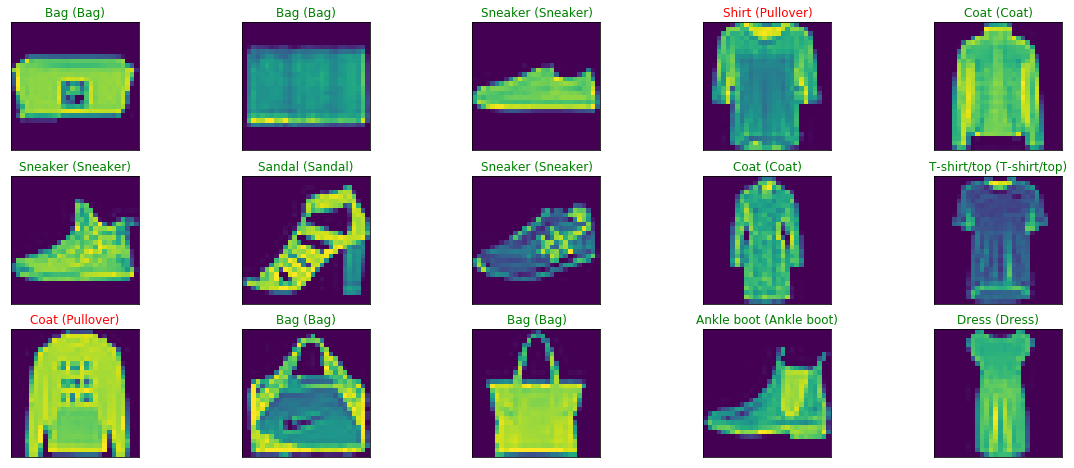

In [246]:
#Borrowed this from some code I found

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_pred[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

I am only recently beginning my journey into deep learning and image processing. As such I spend a fair amount of time searching how others have done the work already and using that as a base. 
I make a concerted effort to try and understand what the code is doing and not to just copy-paste. 
  
These are the links I used quite extensively(and unashamedly) used to help me build this:

* https://github.com/margaretmz/deep-learning/blob/master/fashion_mnist_keras.ipynb#scrollTo=Zx-Ee6LHZZgt
* https://www.kaggle.com/gpreda/cnn-with-tensorflow-keras-for-fashion-mnist
* https://www.kaggle.com/bugraokcu/cnn-with-keras
